In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [7]:
df = pd.read_csv('../data/stud.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

In [10]:
df.duplicated().sum()

0

No duplicates are present in the dataset either.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.shape

(1000, 8)

In [14]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [17]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [19]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [20]:
df['math_score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [21]:
df['reading_score'].unique()


array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [22]:
df['writing_score'].unique()


array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] 

In [24]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [25]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [26]:
print("we have {0} numerical features: {1}".format(len(numeric_features), numeric_features))
print("we have {0} numerical features: {1}".format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for Total_score and Average_score.

In [27]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [28]:
pd.DataFrame(df['total_score'])

,total_score
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [29]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
maths = df[df['math_score']==100]['average_score'].count()
writing = df[df['writing_score']==100]['average_score'].count()
reading = df[df['reading_score']==100]['average_score'].count()

print(f"Number of students who got full marks in maths: {maths}")
print(f"Number of students who got full marks in writing: {writing}")
print(f"Number of students ho got full marks in reading: {reading}")

Number of students who got full marks in maths: 7
Number of students who got full marks in writing: 14
Number of students ho got full marks in reading: 17


In [32]:
maths_20 = df[df['math_score'] < 20]['average_score'].count()
writing_20 = df[df['writing_score'] < 20]['average_score'].count()
reading_20 = df[df['reading_score'] < 20]['average_score'].count()

print(f"Number of students who got less than 20 marks in maths: {maths_20}")
print(f"Number of students who got less than 20 marks in writing: {writing_20}")
print(f"Number of students ho got less than 20 marks in reading: {reading_20}")

Number of students who got less than 20 marks in maths: 4
Number of students who got less than 20 marks in writing: 3
Number of students ho got less than 20 marks in reading: 1


In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

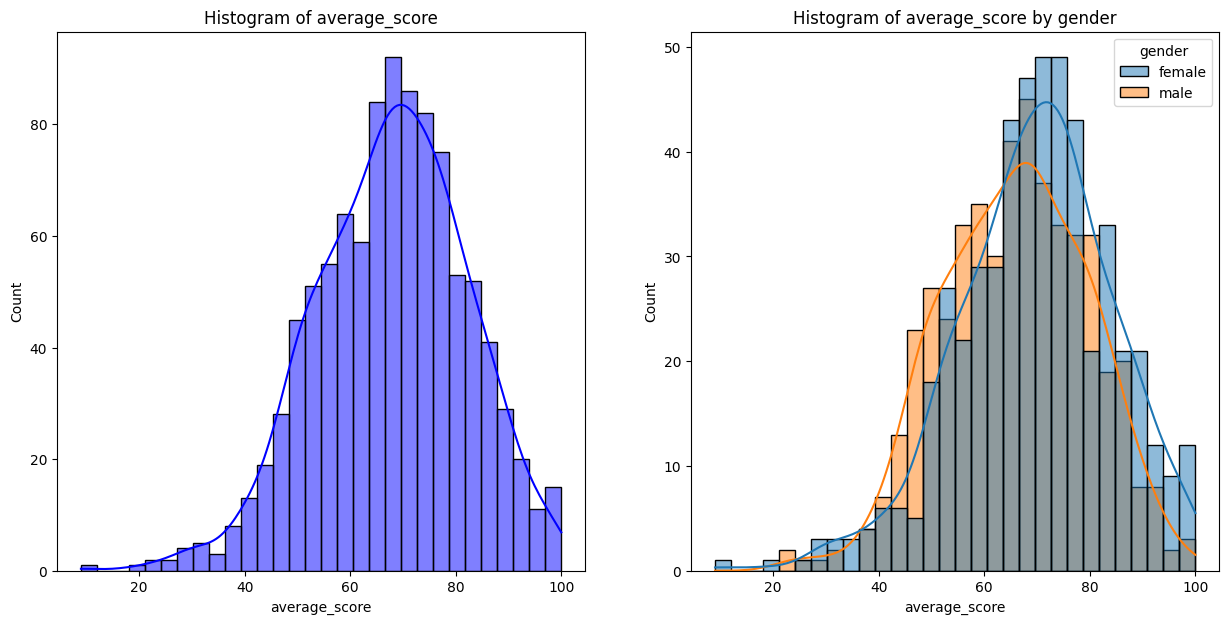

In [34]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram in the first subplot
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='b', ax=axs[0])
axs[0].set_title('Histogram of average_score')

# Plot the second histogram in the second subplot
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Histogram of average_score by gender')

plt.show()
